In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from urllib.error import URLError

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

## Binary classification example

In [2]:
try:
    cancer = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/breast_cancer.csv")
except URLError:
    cancer = pd.read_csv("../lecture_4/breast_cancer_data.csv")

cancer["label"] = cancer["diagnosis"].apply(lambda x: 0 if x == "B" else 1)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,...,texture_extreme,perimeter_extreme,area_extreme,smoothness_extreme,compactness_extreme,concavity_extreme,concave_extreme,symmetry_extreme,fractal_extreme,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
# fit a logistic regression model 
model = smf.glm(
    formula='label ~ radius_mean', 
    data=cancer,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                  569
Model:                            GLM   Df Residuals:                      567
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -165.01
Date:                Wed, 26 Oct 2022   Deviance:                       330.01
Time:                        01:23:03   Pearson chi2:                     489.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5232
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -15.2459      1.325    -11.509      

In [4]:
# bootstrap
np.random.seed(42)

B = 1000  # number of bootstrap
beta_1s = []
for _ in tqdm(range(B)):
    # bootstrap the indices and build the bootstrap data
    idx = np.random.randint(low=0, high=len(cancer), size=len(cancer))
    data_bootstrap = cancer.iloc[idx]
    
    # fit the model
    model_bootstrap = LogisticRegression(penalty="none", random_state=42)
    model_bootstrap.fit(X=data_bootstrap[["radius_mean"]], y=data_bootstrap["label"])
    beta_1s.append(model_bootstrap.coef_.flatten()[0])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 208.00it/s]


The mean of beta_1 is 1.044.
The standard error of beta_1 is 0.093.


<Figure size 640x480 with 0 Axes>

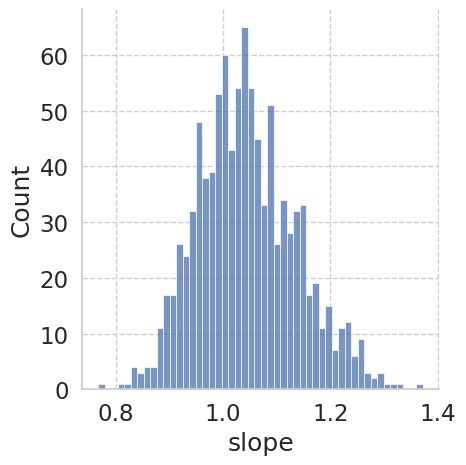

In [7]:
print(f"The mean of beta_1 is {np.mean(beta_1s):5.3f}.")
print(f"The standard error of beta_1 is {np.std(beta_1s, ddof=1):5.3f}.")

plt.figure()
sns.displot(beta_1s, bins=50)
plt.xlabel("slope")
plt.tight_layout()
plt.show()